#**Machine Learning Lab Practice: RESAMPLING METHODS**
### **2020년11월18일 (수) 19:00 KST**

###**Initializing the Dataset**

In [1]:
import pandas as pd

In [2]:
#Importing the Data Set
auto_url="https://raw.githubusercontent.com/junyanyao/ISLR_Python/master/Dataset/Auto.csv"
auto=pd.read_csv(auto_url)
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
x=auto['horsepower']
y=auto['mpg']

In [4]:
#Transform Text Data into Numeric if the data contains number
#For non numeric value --> NaN
auto['horsepower']=pd.to_numeric(auto['horsepower'],errors='coerce')
auto=auto.dropna()
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


###**Defining the X and Y**

In [5]:
import numpy as np
x=np.array(auto['horsepower']).reshape(-1,1)
y=auto['mpg']

###**Validation Set Approach**

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=True,test_size=0.5)

###**Linear Regression**

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression()
#Fit the regressor from train 
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
mean_squared_error(y_test,y_pred)

25.388440534439052

###**Adding Higher Degree Polynomial Terms**

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
poly=PolynomialFeatures(degree=1,include_bias=False)

###**Measuring Validation Set Error by Varying Polynomial Degree from 1 to 10**

In [10]:
import matplotlib.pyplot as plt

In [21]:
x.columns

AttributeError: ignored

Text(0, 0.5, 'MSE')

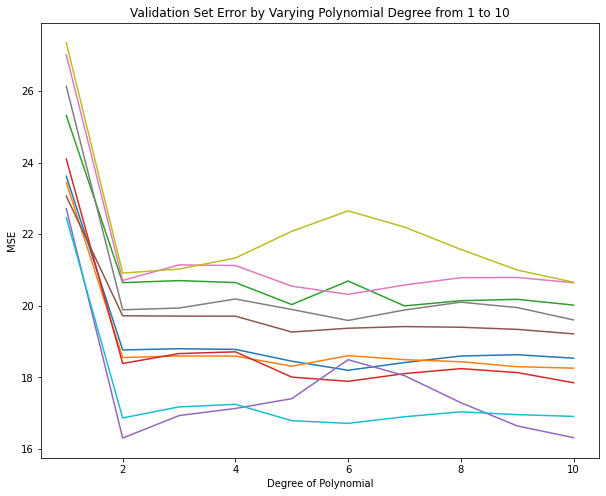

In [26]:
plt.figure(figsize=(10,8),facecolor='w')
plt.title("Validation Set Error by Varying Polynomial Degree from 1 to 10")
for k in range(10):
    mse=[]
    for i in range(1,11):
        poly=PolynomialFeatures(degree=i,include_bias=False)
        x_temp=poly.fit_transform(x)
        x_train,x_test,y_train,y_test=train_test_split(x_temp,y,shuffle=True,test_size=0.5,random_state=k*2)
        reg=LinearRegression()
        reg.fit(x_train, y_train)
        y_pred=reg.predict(x_test)    
        mse.append(mean_squared_error(y_test,y_pred))
    plt.plot(np.arange(1,11),mse)
    #mse=[]
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')

In [12]:
mse

[22.461469776086986,
 16.86233531469401,
 17.171691765340483,
 17.243676743104594,
 16.78612470317312,
 16.71164345717597,
 16.89679091962027,
 17.0343528896531,
 16.955597314253065,
 16.9064832184222]

Text(0, 0.5, 'MSE')

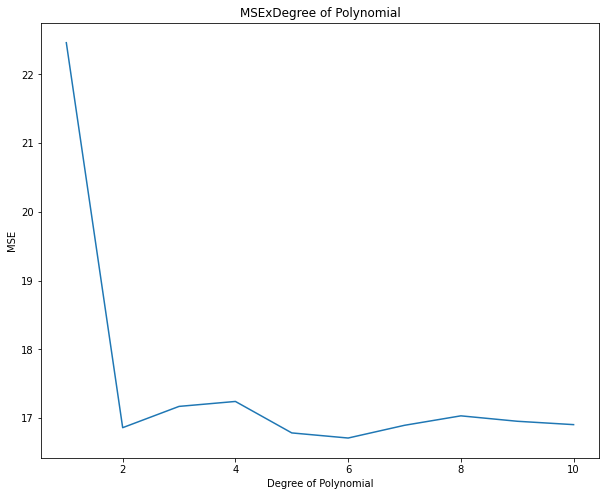

In [13]:
plt.figure(figsize=(10,8),facecolor='w')
plt.title("MSExDegree of Polynomial")
plt.plot(np.arange(1,11),mse)
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')

###**K-fold Cross validation**

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

In [15]:
kfold=KFold(n_splits=10)
reg=LinearRegression()
-1*np.average(cross_val_score(reg,x,y,scoring='neg_mean_squared_error',cv=kfold))

27.439933652339874

Text(0, 0.5, 'MSE')

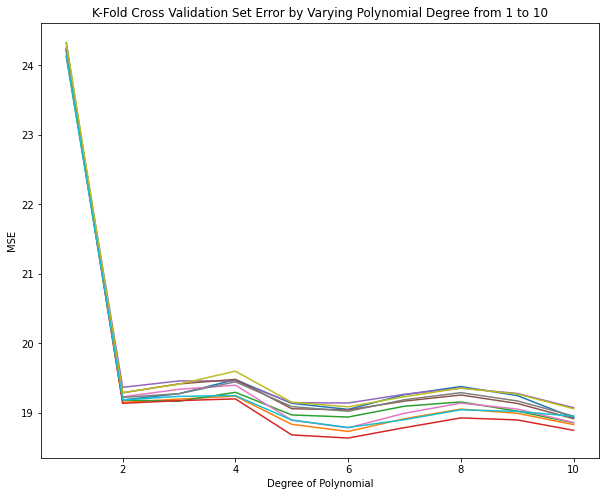

In [16]:
plt.figure(figsize=(10,8),facecolor='w')
plt.title("K-Fold Cross Validation Set Error by Varying Polynomial Degree from 1 to 10")
for k in range(10):
    mse=[]
    for i in range(1,11):
        poly=PolynomialFeatures(degree=i,include_bias=False)
        x_temp=poly.fit_transform(x)
        kfold=KFold(n_splits=10,shuffle=True,random_state=k*2)
        reg=LinearRegression()  
        mse.append(-1*np.average(cross_val_score(reg,x_temp,y,scoring='neg_mean_squared_error',cv=kfold)))
    plt.plot(np.arange(1,11),mse)
    #mse=[]
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')

###**Leave-One-Out Cross Validation**

In [17]:
from sklearn.model_selection import LeaveOneOut

In [18]:
loo=LeaveOneOut()
reg=LinearRegression()
np.average(-1*cross_val_score(reg,x,y,scoring='neg_mean_squared_error',cv=loo))

24.231513517929226

Text(0, 0.5, 'MSE')

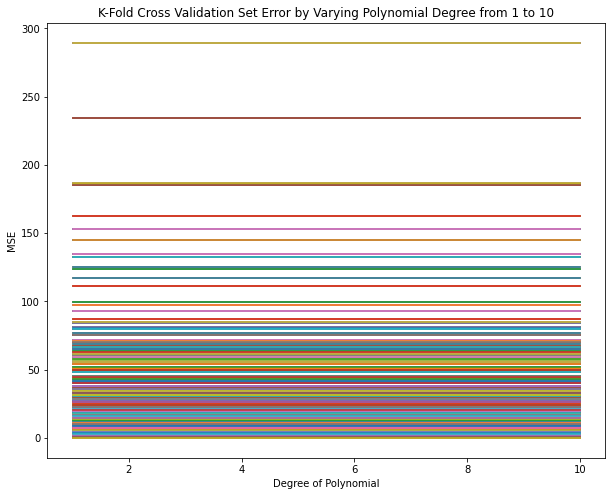

In [19]:
plt.figure(figsize=(10,8),facecolor='w')
plt.title("K-Fold Cross Validation Set Error by Varying Polynomial Degree from 1 to 10")
for k in range(10):
    mse=[]
    for i in range(1,11):
        poly=PolynomialFeatures(degree=i,include_bias=False)
        x_temp=poly.fit_transform(x)
        loo=LeaveOneOut()
        reg=LinearRegression()  
        mse.append(-1*cross_val_score(reg,x,y,scoring='neg_mean_squared_error',cv=loo))
    plt.plot(np.arange(1,11),mse)
    #mse=[]
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')